In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 2: Estimación de Métricas de Dependencia

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye una serie de tiempo real. El dataset importado incluye cuatro series de tiempo de la ciudad de Delhi, India, desde el 1 de enero de 2013 al 1 de enero de 2017 en muestreos diarios. Las series de tiempo incluidas son:

- __meantemp__: Temperatura promedio del día.
- __humidity__: Humedad promedio del día.
- __wind_speed__: Velocidad promedio del viento en el día.
- __meanpressure__: Presión promedio del día.

Este conjunto de datos no contiene datos nulos, por lo que no es necesario realizar una imputación dedatos.

In [3]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["date"] = pd.to_datetime(df["date"])
df.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


## Asignación 1 &#x1F625;

Grafique las series de tiempo __meantemp__, __humidty__ y __wind_speed__.

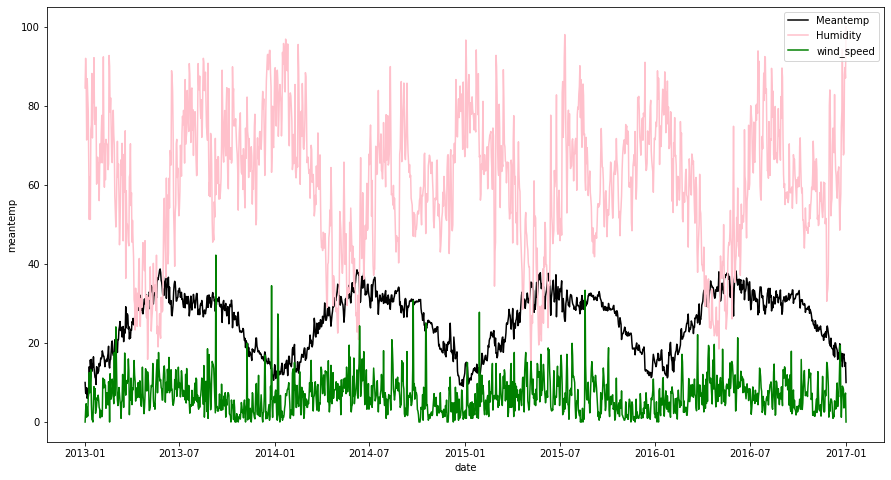

In [4]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df.date, y =df.meantemp, label='Meantemp', color='black')
sns.lineplot(x = df.date, y = df.humidity, label ='Humidity', color='pink')
sns.lineplot(x= df.date, y =df.wind_speed, label='wind_speed', color='green')
plt.xlabel = 'Date'
plt.ylabel = 'Frecuency'

## Asignación 2 &#x1F625;

Grafique el histograma, calcule la media, imprimala y grafíquela en el histograma para las series de tiempo __meantemp__, __humidty__ y __wind_speed__.

Text(0.5, 1.0, 'Histogram and mean')

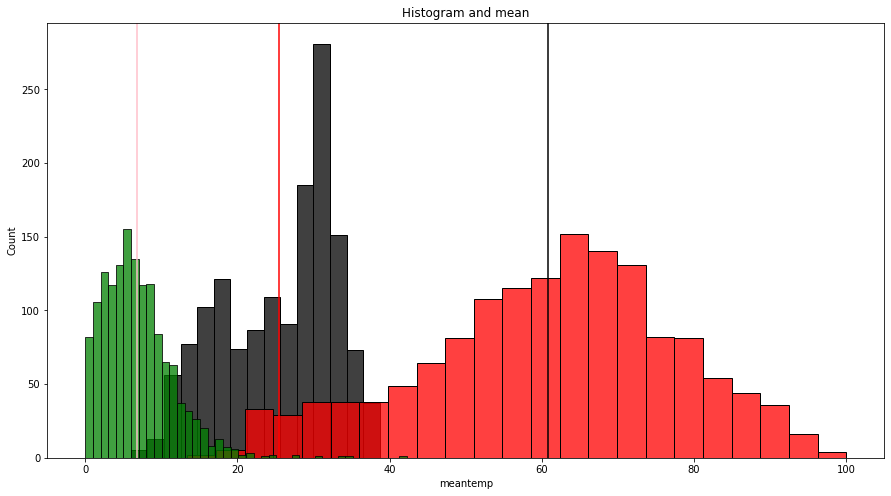

In [5]:
plt.figure(figsize=(15, 8))
sns.histplot(df.meantemp, label='meantep', color='black')
plt.axvline(x=np.mean(df.meantemp), color='red')
sns.histplot(df.humidity, label='Mean Humidty', color='red')
plt.axvline(x=np.mean(df.humidity), color='black')
sns.histplot(df.wind_speed, label='windspeed', color='green')
plt.axvline(x=np.mean(df.wind_speed), color='pink')
plt.title('Histogram and mean')

## Asignación 3 &#x1F625;

Implemente las función de crossvariance descrita debajo

In [6]:
def crossvariance(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    """
    Descripción:
    Esta funcion es la generalización de la autocovarianza.
    
    Entradas:
    - time_series_1: Primera serie de tiempo a utilizar para el cálculo.
    - time_series_2: Segunda serie de tiempo a utilizar para el cálculo.
    - lags: Puede ser uno o varios lags para loscuales debe calcularse la covarianza.
            
    Salidas:
    - Si lags es un número debe regresar un valor de covarianza, si es una lista, 
        debe ser una lista de covarianzas.
    """
    
    # CÓDIGO AQUI
    crossvariances = list()    
    
    # Comprobamos si lags en entero de ser asi lo convertimos a lista
    if isinstance(lags, int):
        return round(np.mean((time_series_1 - np.mean(time_series_1)) * (time_series_2 - np.mean(time_series_2))), 8)
         
    else:
        # Empezamos a calcular la crosscovariance
        for lag in lags:
            crossvariances.append(round(np.mean((time_series_1 - np.mean(time_series_1)) * (time_series_2.shift(periods=lag) - np.mean(time_series_2))), 8))
            
        return crossvariances

In [7]:
for __ts__ in ["meantemp", "humidity", "wind_speed"]:
    __cvars__ = crossvariance(df[__ts__], df[__ts__], 0)
    
    if __cvars__ is not None:
        assert np.isclose(__cvars__, df[__ts__].var(ddof=0)), "Your function has an error"

__cvars__ = crossvariance(df["humidity"], df["wind_speed"], np.arange(5).tolist())
__expected_cvars__ = [-28.58795012, -24.37189775, -21.10904889, -19.62116432, -17.42504231] 

if __cvars__ is not None:
    assert np.allclose(__cvars__, __expected_cvars__), "Your function has an error"

## Asignación 4 &#x1F921;

Implemente las función de crosscorrelation.

In [8]:
def crosscorrelation(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    """
    Descripción:
    Esta funcion es la generalización de la correlación. Usted debe definirla y documentarla como en
    el caso de la función crosscovariance.
    
    Entradas:
    - time_series_1: Primera serie de tiempo a utilizar para el cálculo.
    - time_series_2: Segunda serie de tiempo a utilizar para el cálculo.
    - lags: Puede ser uno o varios lags para loscuales debe calcularse la covarianza.
            
    Salidas:
    - Si lags es un número debe regresar un valor de covarianza, si es una lista, 
        debe ser una lista de covarianzas.
    """
    
    # CÓDIGO AQUI
    if isinstance(lags, int):
        # Calculamos la crossvarianza
        crosscovariation_ts1_ts2 = crossvariance(time_series_1, time_series_2, lags)
        crosscovariation_ts1_ts1 = crossvariance(time_series_1, time_series_1, 0)
        corsscovariation_ts2_ts2 = crossvariance(time_series_2, time_series_2, 0)
        return crosscovariation_ts1_ts2 / (np.sqrt(crosscovariation_ts1_ts1 * corsscovariation_ts2_ts2))
    else:
        # Se crea lista auxiliar para almacenar la crossvariance
        crosscorrelations = list()
        for lag in lags:
            crosscovariation_ts1_ts2 = crossvariance(time_series_1, time_series_2, lags)
            crosscovariation_ts1_ts1 = crossvariance(time_series_1, time_series_1, 0)
            corsscovariation_ts2_ts2 = crossvariance(time_series_2, time_series_2, 0)
            crosscorrelations.append(crosscovariation_ts1_ts2 / (np.sqrt(crosscovariation_ts1_ts1 * corsscovariation_ts2_ts2)))
        return crosscorrelations
        

In [82]:
def autocorrelation_plot_two_series(data1 : pd.Series, data2 : pd.Series, lags : int, titulo1 : str, titulo2 : str, lineas : bool):
    """
    Función para graficar el autocorrelación de dos series de pandas.

    Parámetros:
    -----------
    data1 : pandas.Series
        Serie de datos 1.
    data2 : pandas.Series
        Serie de datos 2.
    lags : int
        El número de lags a mostrar dentro del grafico
        
    titulo1 : str
        El nombre de la primer serie de datos
    
    titulo2 : str
        El nomobre de la segunda serie de datos
        
    lineas : bool
        Valor booleano que indica si se usarán lineas rectas o puntos para graficar la crosscorrelation
    Returns:
    --------
    None (la función solo traza la gráfica)
    """
    stds = np.array([2, 2.5, 3])
    colors = ['gray', 'black', 'orange']
    i = 0
    
     # Calculamos la desviacion estandar
    std = 1 / (len(data1) ** 0.5)
    # std = np.std(np.linalg.norm (np.array(data1)))
    representativas = stds * std
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Limitamos el eje x al numero de lags que quiere mostrar
    # ax.axes()
    # axes = plt.axes()
    # axes.set_xlim([0, lags])
    ax.set_xlim([0, lags])
    
    # Agrega las lineas de dos, dos punto cinco y tres desviaciones estandar
    for st, col in zip(representativas, colors):
        ax.axhline(y=st, ls='--', c=col, label=f'{stds[i]} Desviaciones estandar')
        ax.axhline(y=-st, ls='--', c=col, label=f'-{stds[i]} Desviaciones estandar')
        i+=1
    
    # Calcula la autocorrelacion de las dos series de datos y grafica
    ax.xcorr(data1, data2, usevlines=lineas, normed=True, maxlags=lags, color='blue')
    
    # Calcula la autocorrelación de las dos series de datos y grafica
    # ax.acorr(data1, maxlags=lags, label='Serie 1', color='blue', normed=True)
    # ax.acorr(data2, maxlags=lags, label='Serie 2', color='orange', normed)
    
    # Ajusta las propiedades del gráfico
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrelación')
    ax.set_title(f'Cross correlation de {titulo1} y {titulo2}')
    ax.legend()
    
    plt.show()


## Asignación 5 &#x1F643;

Grafique el correlograma de la autocorrelación de la serie de tiempo __wind_speed__ junto con las lineas representativas de 2, 2.5 y 3 veces la desviación estándar (valores de correlaciones de interés).

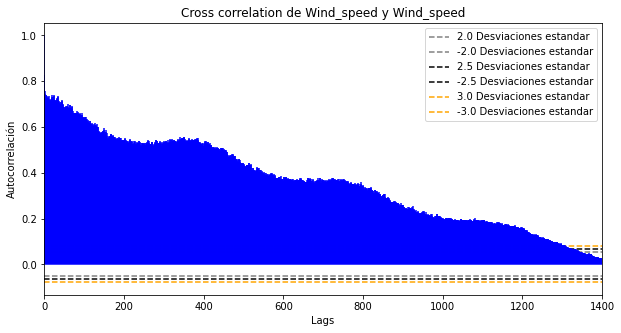

In [84]:
autocorrelation_plot_two_series(df.wind_speed, df.wind_speed, 1400, 'Wind_speed', 'Wind_speed', True)

## Asignación 6 &#x1F643;

Grafique el correlograma de la correlación cruzada de la serie de tiempo __wind_speed__ y __humidity__ junto con las lineas representativas de 2, 2.5 y 3 veces la desviación estándar (valores de correlación de interés).

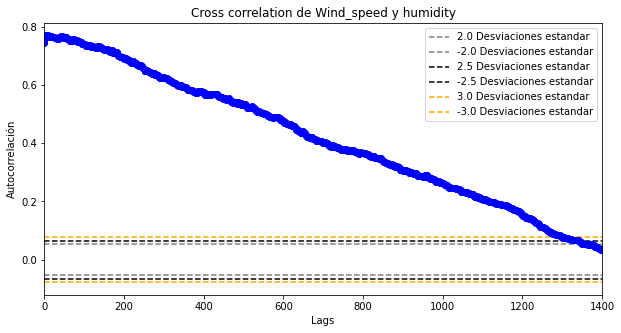

In [85]:
autocorrelation_plot_two_series(df.wind_speed, df.humidity, 1400, 'Wind_speed', 'humidity', False)

## Integrity Tests

In [86]:
import hashlib

cell_signs = [
    "b133c1b74dff90eff20627c4b853c23441652b2d"
]

for content in _ih:
    content_sign = str(hashlib.sha1(content.strip().encode("utf-8")).hexdigest())
    if content_sign == cell_signs[0]:
        cell_signs.pop(0)
        if len(cell_signs) == 0:
            break
        
if len(cell_signs) > 0:
    print("Something was modified...")
    for cell_sign in cell_signs:
        print(cell_sign)

In [87]:
content = _ih[-2]

program_sign = "f8ca458c26e5eddbdfe6e06004c808b25a7634ca"
if str(hashlib.sha1(content.strip().encode("utf-8")).hexdigest()) == program_sign:
    print("Everything is consistent :)")

Everything is consistent :)
